## Cryptocurrency correlation analysis in Python

In [26]:
# import basic packages and make our matplotlib figures display in this notebook
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
def get_data_spec(coin, date, time_period):
    """ Query the API for 2000 units historical price data starting from "date". """
    url = "https://min-api.cryptocompare.com/data/{}?fsym={}&tsym=USD&limit=2000&toTs={}".format(time_period, coin, date)
    r = requests.get(url)
    ipdata = r.json()
    return ipdata

In [3]:
def get_df_spec(time_period, coin, from_date, to_date):
    """ Get historical price data between two dates. If further apart than query limit then query multiple times. """
    date = to_date
    holder = []
    while date > from_date:
        # Now we use the new function to query specific coins
        data = get_data_spec(coin, date, time_period) 
        holder.append(pd.DataFrame(data['Data']))
        date = data['TimeFrom'] 
    df = pd.concat(holder, axis = 0)
    df = df[df['time']>from_date]
    df['time'] = pd.to_datetime(df['time'], unit='s') 
    df.set_index('time', inplace=True)
    df.sort_index(ascending=False, inplace=True)
    # And just keep the close price, with the column heading as the name of the coin. 
    df.rename(columns={'close':coin}, inplace=True)
    return df[coin]

In [18]:
coins = ['BTC', 'ETH', 'XRP', 'USDT', 'BCH', 'BSV', 'LTC', 'ADA', 'CRO', 'BNB', 'EOS', 'LINK', 'XTZ', 'XLM', 'XMR', 'HT']

In [30]:
holder = []
# UNIX time inputs:
from_date = int(datetime.datetime(2020, 1, 1).timestamp())
# print(from_date)
to_date = int(datetime.datetime.now().timestamp())
time_period = 'histoday'
for coin in coins:
    holder.append(get_df_spec(time_period, coin, from_date, to_date))
df = pd.concat(holder, axis = 1)

In [31]:
# convert each of the columns of the DataFrame to be returns rather than price!
df = df.divide(df.shift())-1

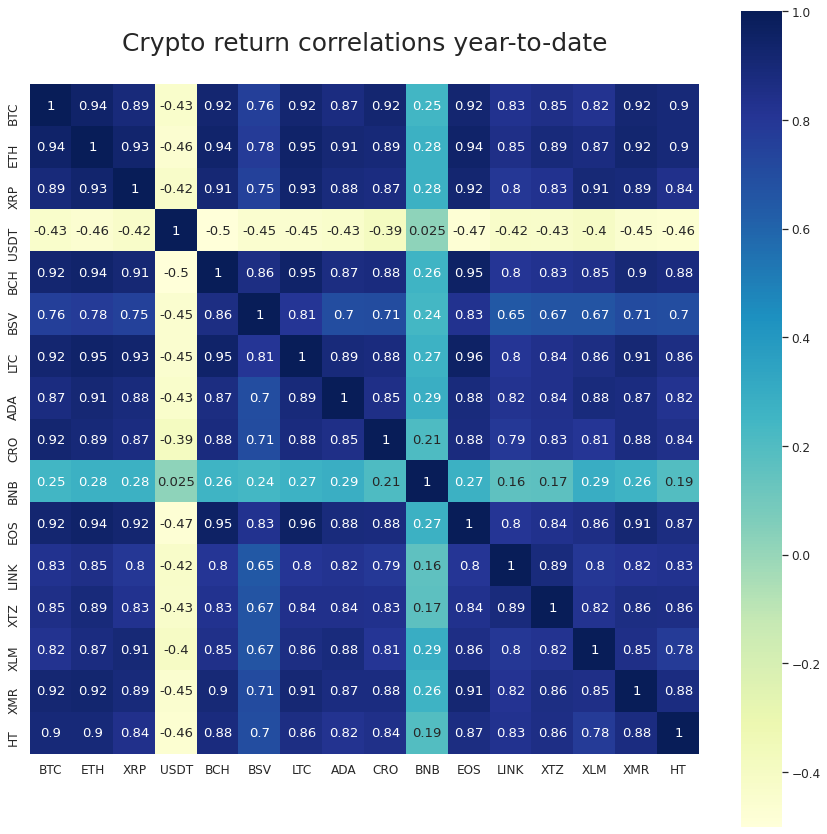

In [33]:
import seaborn as sns
sns.set(font_scale=1.1)
plt.figure(figsize=(15,15))
plt.title('Crypto return correlations year-to-date\n', fontsize=25)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", square = True);

In [47]:
period = 7
holder = []
# UNIX time inputs:
today = datetime.datetime.now()
to_date = int(today.timestamp())
from_date = int((today-datetime.timedelta(days=period)).timestamp())
 
time_period = 'histohour'
for coin in coins:
    holder.append(get_df_spec(time_period, coin, from_date, to_date))
df = pd.concat(holder, axis = 1)

In [48]:
df = df.divide(df.shift())-1

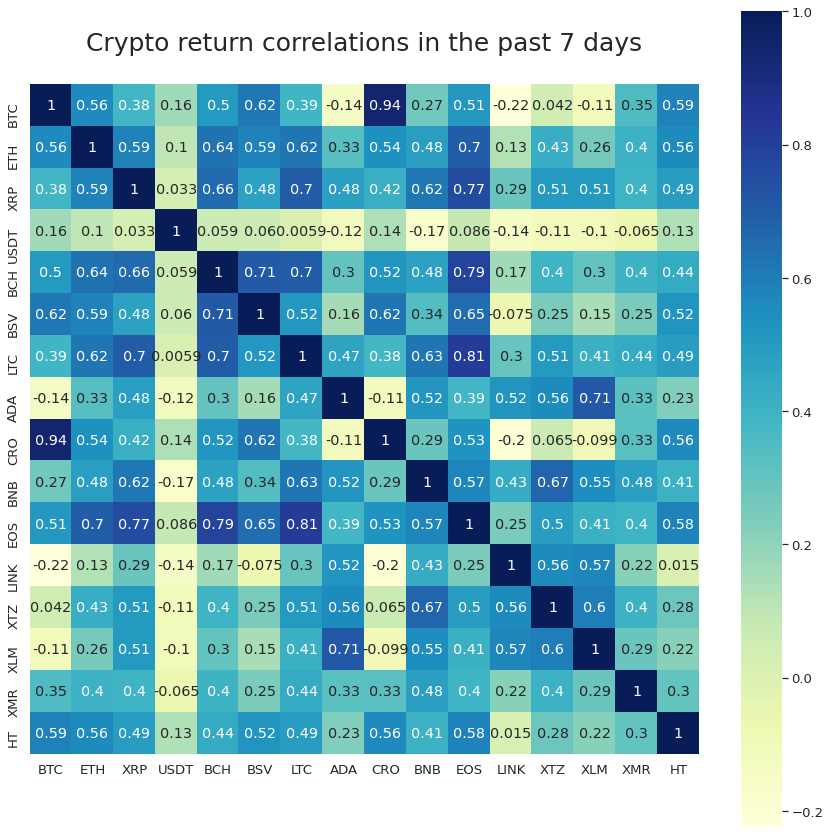

In [49]:
import seaborn as sns
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 15))
plt.title('Crypto return correlations in the past {} days\n'.format(period), fontsize=25)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", square = True);